In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Single Neuron

In [2]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] + bias)
print(output)

2.3


## A Layer of Neurons

Manual method

In [3]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
            # Neuron 1:
            inputs[0]*weights1[0] +
            inputs[1]*weights1[1] +
            inputs[2]*weights1[2] +
            inputs[3]*weights1[3] + bias1,
            # Neuron 2:
            inputs[0]*weights2[0] +
            inputs[1]*weights2[1] +
            inputs[2]*weights2[2] +
            inputs[3]*weights2[3] + bias2,
            # Neuron 3:
            inputs[0]*weights3[0] +
            inputs[1]*weights3[1] +
            inputs[2]*weights3[2] +
            inputs[3]*weights3[3] + bias3
]

print(outputs)

[4.8, 1.21, 2.385]


Loop method

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for neuron_input, weight in zip(inputs, neuron_weights):
        neuron_output += neuron_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


Matrix method

In [5]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


## A Layer of Neurons with Batch Data

In [6]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]
            
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = np.dot(inputs, np.array(weights).T) + biases
print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## Adding Another Layer of Neurons

In [7]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]
            
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Adding Non-Linear Data

In [8]:
def spiral_data(num_samples, num_classes):
    N = num_samples # number of points per class
    D = 2 # dimensionality
    K = num_classes # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X, y

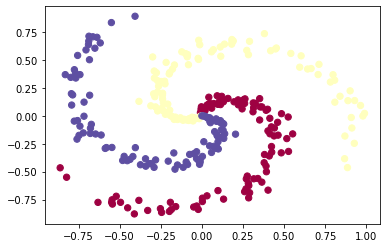

In [9]:
X, y = spiral_data(100, 3)

## Creating NN Class

In [10]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [11]:
dense1 = Layer_Dense(2, 3)
dense1.forward(X)
print(dense1.output[:5])

[[ 0.          0.          0.        ]
 [ 0.01720975 -0.00459074 -0.00490145]
 [ 0.03652352 -0.00926773 -0.01183298]
 [ 0.03480153 -0.01219115 -0.00115289]
 [ 0.06227242 -0.0179121  -0.01381735]]


## Activation Functions

In [12]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [23]:
# Tradiitonal Softmax
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs)
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return norm_values

In [30]:
# Modified Softmax to Prevent Exploding Gradients
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

## Putting Forward Pass Together

In [31]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33319823 0.33204929 0.33475248]
 [0.33302376 0.33044144 0.33653481]
 [0.33331247 0.33160777 0.33507975]
 [0.33287974 0.32915371 0.33796654]]


In [15]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward_propagation(self, input):
        raise NotImplementedError
        
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [16]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        # Random weights initialization
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(1, output_size)
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        
        return input_error

In [17]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [18]:
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [19]:
def relu(x):
    return (np.maximum(0, x))

def relu_prime(x):
    return (x > 0).astype(x.dtype)

In [20]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [21]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [22]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# network
net = Network()
net.add(FCLayer(2, 3))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(3, 10))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 1))
net.add(ActivationLayer(relu, relu_prime))

# train
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

# test
out = net.predict(x_train)
print(out)

epoch 1/1000   error=11.305995
epoch 2/1000   error=0.500000
epoch 3/1000   error=0.500000
epoch 4/1000   error=0.500000
epoch 5/1000   error=0.500000
epoch 6/1000   error=0.500000
epoch 7/1000   error=0.500000
epoch 8/1000   error=0.500000
epoch 9/1000   error=0.500000
epoch 10/1000   error=0.500000
epoch 11/1000   error=0.500000
epoch 12/1000   error=0.500000
epoch 13/1000   error=0.500000
epoch 14/1000   error=0.500000
epoch 15/1000   error=0.500000
epoch 16/1000   error=0.500000
epoch 17/1000   error=0.500000
epoch 18/1000   error=0.500000
epoch 19/1000   error=0.500000
epoch 20/1000   error=0.500000
epoch 21/1000   error=0.500000
epoch 22/1000   error=0.500000
epoch 23/1000   error=0.500000
epoch 24/1000   error=0.500000
epoch 25/1000   error=0.500000
epoch 26/1000   error=0.500000
epoch 27/1000   error=0.500000
epoch 28/1000   error=0.500000
epoch 29/1000   error=0.500000
epoch 30/1000   error=0.500000
epoch 31/1000   error=0.500000
epoch 32/1000   error=0.500000
epoch 33/1000   

epoch 654/1000   error=0.500000
epoch 655/1000   error=0.500000
epoch 656/1000   error=0.500000
epoch 657/1000   error=0.500000
epoch 658/1000   error=0.500000
epoch 659/1000   error=0.500000
epoch 660/1000   error=0.500000
epoch 661/1000   error=0.500000
epoch 662/1000   error=0.500000
epoch 663/1000   error=0.500000
epoch 664/1000   error=0.500000
epoch 665/1000   error=0.500000
epoch 666/1000   error=0.500000
epoch 667/1000   error=0.500000
epoch 668/1000   error=0.500000
epoch 669/1000   error=0.500000
epoch 670/1000   error=0.500000
epoch 671/1000   error=0.500000
epoch 672/1000   error=0.500000
epoch 673/1000   error=0.500000
epoch 674/1000   error=0.500000
epoch 675/1000   error=0.500000
epoch 676/1000   error=0.500000
epoch 677/1000   error=0.500000
epoch 678/1000   error=0.500000
epoch 679/1000   error=0.500000
epoch 680/1000   error=0.500000
epoch 681/1000   error=0.500000
epoch 682/1000   error=0.500000
epoch 683/1000   error=0.500000
epoch 684/1000   error=0.500000
epoch 68

epoch 930/1000   error=0.500000
epoch 931/1000   error=0.500000
epoch 932/1000   error=0.500000
epoch 933/1000   error=0.500000
epoch 934/1000   error=0.500000
epoch 935/1000   error=0.500000
epoch 936/1000   error=0.500000
epoch 937/1000   error=0.500000
epoch 938/1000   error=0.500000
epoch 939/1000   error=0.500000
epoch 940/1000   error=0.500000
epoch 941/1000   error=0.500000
epoch 942/1000   error=0.500000
epoch 943/1000   error=0.500000
epoch 944/1000   error=0.500000
epoch 945/1000   error=0.500000
epoch 946/1000   error=0.500000
epoch 947/1000   error=0.500000
epoch 948/1000   error=0.500000
epoch 949/1000   error=0.500000
epoch 950/1000   error=0.500000
epoch 951/1000   error=0.500000
epoch 952/1000   error=0.500000
epoch 953/1000   error=0.500000
epoch 954/1000   error=0.500000
epoch 955/1000   error=0.500000
epoch 956/1000   error=0.500000
epoch 957/1000   error=0.500000
epoch 958/1000   error=0.500000
epoch 959/1000   error=0.500000
epoch 960/1000   error=0.500000
epoch 96